### Distancia de luminosidad $D_L$

In [307]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import math

#Constantes
H_0 = 70
#c en mpc/s??  
c= 3e6 
#c= 3e8

f = open("C:/Users/antoc/Downloads/PortableGit/practica2024/lcparam_full_long.txt")
#print(f.readlines())
lineas = f.readlines()

# Divide cada línea en columnas usando espacio como separador
datos_separados = [linea.strip().split(' ') for linea in lineas]

datos= []
for fila in datos_separados:
    datos.append(fila)
    #print(fila)

#print('datos:',datos)
f.close()

z_cmb = []
for i in range(1,len(datos)):
  a= float(datos[i][1])
  z_cmb.append(a)

#print('z_cmb:', z_cmb)
array_z_cmb = np.array(z_cmb)
c_z_cmb = c*array_z_cmb

m_b = []
for i in range(1, len(datos)):
  a= float(datos[i][4])
  m_b.append(a)

#print('m_b:', m_b)

dm_b = []
for i in range(1, len(datos)):
    a= float(datos[i][5])
    dm_b.append(a)

#print('dm_b:', dm_b)


#Relación magnitud aparente y absoluta con distancia de luminosidad
M = -19.3
D_L = np.zeros(len(m_b))
for i in range(len(m_b)):
  D_L[i]= 10**((m_b[i]-M-25)/5)
  
#print('D_L:', D_L)


In [308]:
#utilizando propagación de errores
dD = []
for i in range(len(dm_b)):
  a= (2**((m_b[i]-M-25)/5)) * (5**(((m_b[i]-M-25)/5)-1))* np.log(10) * dm_b[i]
  dD.append(a)

Graficamos la función teórica de $D_L$ junto a los datos. Se tiene que $\Omega_s = \Omega_r + \Omega_m + \Omega_\Lambda + \Omega_k = 1$  a partir de lo que se fijan los parámetros. 

Esta función está dada por $$D_L(z) = \dfrac{c}{H_0}(1+z) \int_{0}^{z} \dfrac{1}{\sqrt{\Omega_r (1+z)^4 + \Omega_m(1+z)^3 + \Omega_l + \Omega_k(1+z)^2}} \,dz$$

Luego, tomando curvatura $\Omega_k = 0$ se tiene:

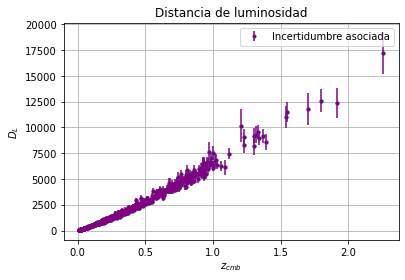

In [311]:
#Parámetros
omega_r = 8.4e-5
omega_m = 0.3
omega_l = 0.7
omega_k = 0

def regla_trapecio_numerica(x, y, j):
    integral = 0
    n = j
    for i in range(1, n):
        integral += (x[i] - x[i - 1]) * (y[i] + y[i - 1])/2
    return integral

#Función a integrar
func1 = ((omega_r * (1+array_z_cmb)**4) + omega_m * (1+array_z_cmb)**3 + omega_l + omega_k* (1+array_z_cmb)**2)**(-1/2)

# Calcular la aproximación de la integral utilizando la regla del trapecio
resultado_integral = np.zeros_like(D_L)
for j in range(len(array_z_cmb)):
    resultado_integral[j] = regla_trapecio_numerica(array_z_cmb, func1, j)
    #print("El resultado de la integral es:", resultado_integral[j])

#Ecuación
DL_t = np.zeros(len(array_z_cmb))
DL_t = (c/H_0)*(1+array_z_cmb)* resultado_integral

plt.plot(z_cmb, D_L, '.')
#plt.plot(array_z_cmb, DL_t)

plt.xlabel('$ z_{cmb} $')
plt.ylabel('$ D_L $')
plt.errorbar(z_cmb, D_L, yerr=dD, fmt='.', color='purple', label = 'Incertidumbre asociada')

plt.title('Distancia de luminosidad')
plt.legend()
plt.grid(True)
plt.show()


Como los datos están en desorden con respecto al redshift no se observa la curva correcta.

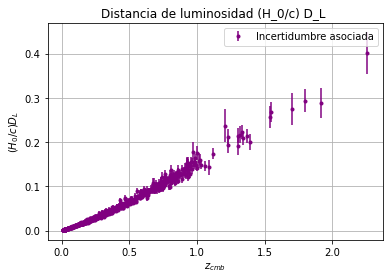

In [305]:
dD_H0_c = np.zeros_like(dD)
for i in range(len(dm_b)):
  dD_H0_c[i]= dD[i]*H_0/c

plt.xlabel('$ z_{cmb} $')
plt.ylabel('$ (H_0/c) D_L $')
plt.errorbar(z_cmb, H_0*D_L/c, yerr=dD_H0_c, fmt='.', color='purple', label = 'Incertidumbre asociada')

plt.title('Distancia de luminosidad (H_0/c) D_L ')
plt.legend()
plt.grid(True)
plt.show()

Obtuvimos órdenes de magnitud distintos a los esperados. (Página 135, Ryden)

Se obtienen los datos del parámetro de Hubble a partir de los datos de magnitud aparente y por lo tanto de la distancia de luminosidad encontrada.

In [318]:
func= np.zeros_like(D_L)
for i in range(len(D_L)):
  func[i] = D_L[i]/(1+z_cmb[i])

derivada = np.zeros_like(D_L)
for i in range(len(D_L)-1):
  if z_cmb[i+1]- z_cmb[i] ==0:
    derivada[i] = 0
  else:
    derivada[i] = (func[i+1] - func[i]) / (2 * (z_cmb[i+1]- z_cmb[i]))


H_DL = np.zeros_like(D_L)
for i in range(len(D_L)):
  if derivada[i] == 0:
    H_DL[i]=0
  else:
    H_DL[i] = c * (1/derivada[i])

#Sacándole un dato a H(z) para observar la distribución
for i in range(len(D_L)-1):
  if H_DL[i] >= 1 * (10**-9):
    H_DL[i] = 0


Creando la ecuación física del parámetro de Hubble para un universo con radiación, materia y constante cosmológica $\Lambda$, se tiene:
$$H(z) = H_0 \left[\Omega_r (1+z)^4 + \Omega_m(1+z)^3 + \Omega_l + \Omega_k(1+z)^2 \right]^{1/2}$$

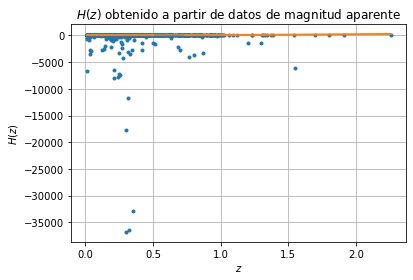

In [304]:
#Parámetros
omega_r = 8.4e-5
omega_m = 0.3
omega_l = 0.7
omega_k = 0

#Ecuación
H_t_DL = np.zeros(len(array_z_cmb))
H_t_DL = H_0* ((omega_r * (1+array_z_cmb)**4) + omega_m * (1+array_z_cmb)**3 + omega_l + omega_k* (1+array_z_cmb)**2)**(1/2)


plt.plot(z_cmb, H_DL, '.')
plt.plot(z_cmb, H_t_DL)

plt.xlabel('$ z $')
plt.ylabel('$ H(z)$')
plt.title('$H(z)$ obtenido a partir de datos de magnitud aparente')
plt.grid(True)
plt.show()

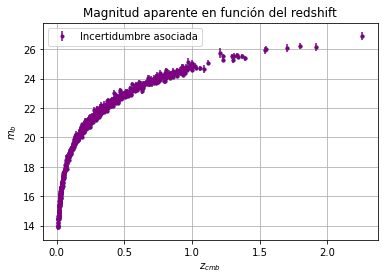

In [294]:
# Ajustar modelo polinomial grado 2
model = np.poly1d(np.polyfit(z_cmb, m_b, 2))

# Crear polilínea de diagrama de dispersión
polyline = np.linspace(0, 2.5, 50)
plt.plot(z_cmb, m_b, '.')

plt.xlabel('$ z_{cmb} $')
plt.ylabel('$ m_b $')
plt.errorbar(z_cmb, m_b, yerr=dm_b, fmt='.', color='purple', label = 'Incertidumbre asociada')
#plt.plot(polyline, model(polyline), color='blue', label = 'Ajuste polinomial de orden 2')
plt.title('Magnitud aparente en función del redshift')
plt.legend()
plt.grid(True)
plt.show()

Gráfico de magnitud aparente distinto al esperado (Dark energy in practice, pág 11)

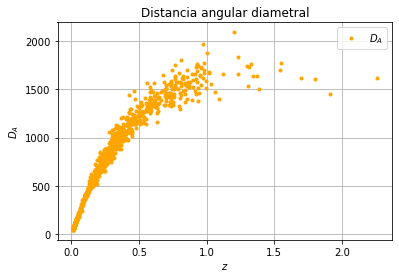

In [320]:
d_a1 = np.zeros_like(D_L)
for i in range(len(D_L)):
    d_a1[i] = D_L[i] * (1/((1+z_cmb[i])**2))

plt.plot(z_cmb, d_a1, '.', color = 'orange', label='$D_A$')



plt.xlabel('$ z $')
plt.ylabel('$D_A$')
plt.title('Distancia angular diametral')
plt.grid(True)
plt.legend()
plt.show()

A comparar con gráfico 7.4 (Ryden, pág 139) 

### Parámetro de Hubble H(z)

In [296]:
f = open("C:/Users/antoc/Downloads/PortableGit/practica2024/hub_data.txt")
#print(f.readlines())
lineas2 = f.readlines()

# Divide cada línea en columnas usando espacio como separador
datos_separados2 = [linea.strip().split(' ') for linea in lineas2]

datos= []
for fila in datos_separados2:
    datos.append(fila)
    #print(fila)

z = []
for i in range(len(datos)):
      a = float(datos[i][0])
      z.append(a)
#print('z:', z)

H = []
for i in range(len(datos)):
   if datos[i][1] == '':
      a = float(datos[i][2])
      H.append(a)
   else:
      a = float(datos[i][1])
      H.append(a)
#print('H:', H)

desv = []
for i in range(len(datos)):
    a = float(datos[i][2])
    desv.append(a)
#print('desv:', desv)


Creando la ecuación física del parámetro de Hubble para un universo con radiación, materia y constante cosmológica $\Lambda$, se tiene:
$$H(z) = H_0 \left[\Omega_r (1+z)^4 + \Omega_m(1+z)^3 + \Omega_l + \Omega_k(1+z)^2 \right]^{1/2}$$

In [297]:
#Parámetros
omega_r = 8.4e-5
omega_m = 0.3
omega_l = 0.7
omega_k = 0

#Creamos la función teórica
array_z = np.array(z)

H_t = np.zeros(len(array_z))
H_t = H_0* ((omega_r * (1+array_z)**4) + omega_m * (1+array_z)**3 + omega_l + omega_k* (1+array_z)**2)**(1/2)

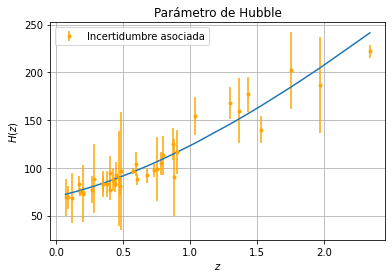

In [298]:
yerr = desv
plt.xlabel('$ z $')
plt.ylabel('$ H(z) $')
plt.title('Parámetro de Hubble')
plt.plot(array_z, H_t)
plt.errorbar(z, H, yerr=yerr, fmt='.', color = 'orange', label = 'Incertidumbre asociada')
plt.legend()
plt.grid(True)
plt.show()

Del mismo orden de magnitud esperado según "a 6% measurment of the Hubble parameter..." (página 14)

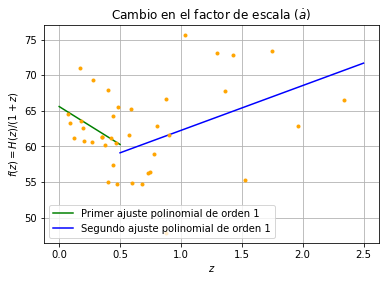

In [299]:
f = np.zeros_like(H)
for i in range(len(H)):
  f[i] = H[i]/(1+ z[i])

model2 = np.poly1d(np.polyfit(z[:20], f[:20], 1))
polyline2 = np.linspace(0, 0.5, 50)
plt.plot(polyline2, model2(polyline2), color='green', label = 'Primer ajuste polinomial de orden 1')
model3 = np.poly1d(np.polyfit(z[20:], f[20:], 1))
polyline3 = np.linspace(0.5, 2.5, 50)
plt.plot(polyline3, model3(polyline3), color='blue', label = 'Segundo ajuste polinomial de orden 1')

plt.xlabel('$ z $')
plt.ylabel('$ f(z) = H(z)/(1+z)$')
plt.title('Cambio en el factor de escala $(\dot{a})$')
plt.plot(z, f,'.', color = 'orange')
plt.legend()
plt.grid(True)
plt.show()

Del mismo orden de magnitud esperado según "a 6% measurment of the Hubble parameter..." (página 17)

Se obtuvo $D_L$ a partir de datos del parámetro de Hubble utilizando la ecuación $$D_L(z) = c \dfrac{1+z}{H_0} \int_0^z{dz}{\dfrac{1}{E(z)}}$$

Graficamos la función teórica de $D_L$ junto a los datos. Se tiene que $\Omega_s = \Omega_r + \Omega_m + \Omega_\Lambda + \Omega_k = 1$  a partir de lo que se fijan los parámetros. 

Esta función está dada por $$D_L(z) = \dfrac{c}{H_0}(1+z) \int_{0}^{z} \dfrac{1}{\sqrt{\Omega_r (1+z)^4 + \Omega_m(1+z)^3 + \Omega_l + \Omega_k(1+z)^2}} \,dz$$

Luego, tomando curvatura $\Omega_k = 0$ se tiene:

In [313]:
E = np.zeros_like(H)
for i in range(len(H)):
    E[i] = H[i]/H_0

def regla_trapecio_numerica(x, y, j):
    integral = 0
    n = j
    for i in range(1, n):
        integral += (x[i] - x[i - 1]) * (y[i] + y[i - 1])/2

    return integral

# Calcular la aproximación de la integral utilizando la regla del trapecio

resultado_integral = np.zeros_like(H)
for j in range(len(H)):
    resultado_integral[j] = regla_trapecio_numerica(z, 1/E, j)
    #print("El resultado de la integral es:", resultado_integral[j])

D_LH = np.zeros_like(H)
for i in range(len(H)):
    D_LH[i]= c * (1+ z[i])/ H_0 * resultado_integral[i]


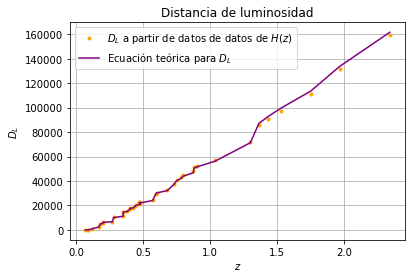

In [317]:
def regla_trapecio_numerica(x, y, j):
    integral = 0
    n = j
    for i in range(1, n):
        integral += (x[i] - x[i - 1]) * (y[i] + y[i - 1])/2
    return integral

#Función a integrar
func2 = ((omega_r * (1+array_z)**4) + omega_m * (1+array_z)**3 + omega_l + omega_k* (1+array_z)**2)**(-1/2)

# Calcular la aproximación de la integral utilizando la regla del trapecio
resultado_integral = np.zeros_like(D_LH)
for j in range(len(array_z)):
    resultado_integral[j] = regla_trapecio_numerica(array_z, func2, j)
    #print("El resultado de la integral es:", resultado_integral[j])

#Ecuación
DL_t_H = np.zeros(len(array_z))
DL_t_H= (c/H_0)*(1+array_z)* resultado_integral


plt.plot(z, D_LH, '.', color = 'orange', label= '$D_L$ a partir de datos de datos de $H(z)$')
plt.plot(array_z, DL_t_H, color = 'purple', label= 'Ecuación teórica para $D_L$')

plt.xlabel('$ z $')
plt.ylabel('$ D_L$')
plt.title('Distancia de luminosidad')
plt.grid(True)
plt.legend()
plt.show()

No handles with labels found to put in legend.


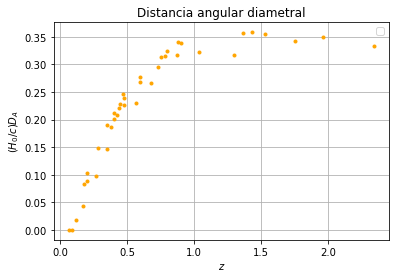

In [321]:
d_a = np.zeros_like(D_LH)
for i in range(len(D_LH)):
    d_a[i] = D_LH[i] * (1/((1+z[i])**2))

d_a_H0_c = np.zeros_like(D_LH)
for i in range(len(D_LH)):
    d_a_H0_c[i] = d_a[i]* H_0/c

plt.plot(z, d_a_H0_c, '.', color = 'orange')


plt.xlabel('$ z $')
plt.ylabel('$ (H_0/c) D_A$')
plt.title('Distancia angular diametral')
plt.grid(True)
plt.legend()
plt.show()

A comparar con gráfico 7.4 (Ryden, pág 139) 